5.1 Iki hidden layer’lı bir Multilayer Perceptron (MLP) olu ̧sturun be ̧sinci ve altıncı haf-
talarda yaptı ̆gımız gibi. Hazır aktivasyon fonksiyonlarını kullanmak serbest.  ̇Ilk hidden
layer’da 100, ikinci hidden layer’da 50 n ̈oron olsun. Hidden layer’larda ReLU, output
layer’da sigmoid aktivasyonu olsun.
Bu MLP'nin pytorch ile yazılmış class'ının kodunu aşağı kod bloğuna yapıştırın:


In [1]:
import torch
import torch.nn as nn
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Kullanılan cihaz: {device}")

start_time = time.time()

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.sigmoid(self.fc3(out))
        return out

# Initialize model
model = MLP(input_size=10, hidden_size1=100, hidden_size2=50, output_size=1)


Kullanılan cihaz: cpu


5.2 SEED=öğrenci numaranız set ettikten sonra altıncı haftada yazdığımız gibi training batch'lerinden eğitim loss'ları, validation batch'lerinden validasyon loss değerlerini hesaplayan kodu aşağıdaki kod bloğuna yapıştırın ve çıkan figürü de alta ekleyin.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd

# Verileri yükleyelim
train_df = pd.read_csv('/content/sample_data/cure_the_princess_train.csv')
valid_df = pd.read_csv('/content/sample_data/cure_the_princess_validation.csv')

X_train = torch.tensor(train_df.drop(['Cured'], axis=1).values, dtype=torch.float32)
y_train = torch.tensor(train_df['Cured'].values, dtype=torch.float32)
X_valid = torch.tensor(valid_df.drop(['Cured'], axis=1).values, dtype=torch.float32)
y_valid = torch.tensor(valid_df['Cured'].values, dtype=torch.float32)

In [3]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [4]:
SEED = 180401121
torch.manual_seed(SEED)

EPOCHS = 50
LEARNING_RATE = 0.01
BATCH_SIZE = 16
INPUT_DIM = X_train.shape[1]
HIDDEN_DIM1 = 100
HIDDEN_DIM2 = 50
OUTPUT_DIM = 1

train_ds = TensorDataset(X_train, y_train)
valid_ds = TensorDataset(X_valid, y_valid)

train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE)

model = MLP(INPUT_DIM, HIDDEN_DIM1, HIDDEN_DIM2, OUTPUT_DIM)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
    train_loss = 0.0
    valid_loss = 0.0
    
    model.train()
    for i, (inputs, targets) in enumerate(train_dl):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(valid_dl):
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            valid_loss += loss.item()
    
    train_loss /= len(train_dl)
    valid_loss /= len(valid_dl)
    
    print('Epoch: %d/%d, Training Loss: %.4f, Validation Loss: %.4f' % (epoch+1, EPOCHS, train_loss, valid_loss))

Epoch: 1/50, Training Loss: 0.5800, Validation Loss: 0.4907
Epoch: 2/50, Training Loss: 0.4377, Validation Loss: 0.6227
Epoch: 3/50, Training Loss: 0.3373, Validation Loss: 0.2550
Epoch: 4/50, Training Loss: 0.3069, Validation Loss: 0.2819
Epoch: 5/50, Training Loss: 0.2679, Validation Loss: 0.2328
Epoch: 6/50, Training Loss: 0.2623, Validation Loss: 0.2239
Epoch: 7/50, Training Loss: 0.2298, Validation Loss: 0.2581
Epoch: 8/50, Training Loss: 0.2210, Validation Loss: 0.1645
Epoch: 9/50, Training Loss: 0.2221, Validation Loss: 0.1570
Epoch: 10/50, Training Loss: 0.1904, Validation Loss: 0.1493
Epoch: 11/50, Training Loss: 0.1832, Validation Loss: 0.1892
Epoch: 12/50, Training Loss: 0.1656, Validation Loss: 0.2096
Epoch: 13/50, Training Loss: 0.1660, Validation Loss: 0.2439
Epoch: 14/50, Training Loss: 0.1533, Validation Loss: 0.1371
Epoch: 15/50, Training Loss: 0.1431, Validation Loss: 0.1641
Epoch: 16/50, Training Loss: 0.1424, Validation Loss: 0.1711
Epoch: 17/50, Training Loss: 0.14

Figure cizdirdik 

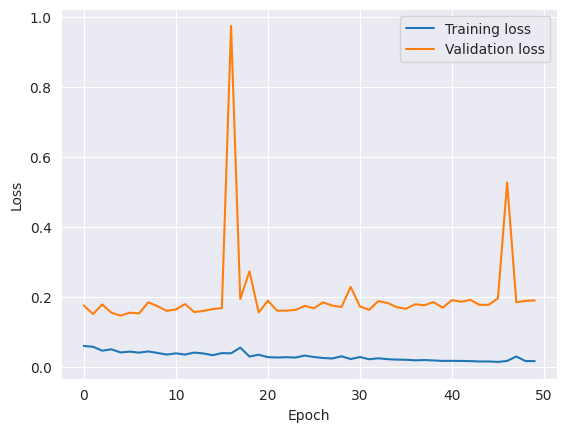

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
train_losses, val_losses = [], []
for epoch in range(EPOCHS):
    train_loss = 0.0
    valid_loss = 0.0
    
    model.train()
    for i, (inputs, targets) in enumerate(train_dl):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(valid_dl):
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            valid_loss += loss.item()
    
    train_loss /= len(train_dl)
    valid_loss /= len(valid_dl)
    train_losses.append(train_loss)
    val_losses.append(valid_loss)
    
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

5.3 SEED=öğrenci numaranız set ettikten sonra altıncı haftada ödev olarak verdiğim gibi earlystopping'deki en iyi modeli kullanarak, Prensesi İyileştir test setinden accuracy, F1, precision ve recall değerlerini hesaplayan kodu yazın ve sonucu da aşağı yapıştırın. \%80'den fazla başarı bekliyorum test setinden. Daha düşükse başarı oranınız, nerede hata yaptığınızı bulmaya çalışın. \%90'dan fazla başarı almak mümkün (ben denedim)

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd

# Verileri yükleyelim
train_df = pd.read_csv('/content/sample_data/cure_the_princess_train.csv')
valid_df = pd.read_csv('/content/sample_data/cure_the_princess_validation.csv')
test_df = pd.read_csv('/content/sample_data/cure_the_princess_test.csv')

X_train = torch.tensor(train_df.drop(['Cured'], axis=1).values, dtype=torch.float32)
y_train = torch.tensor(train_df['Cured'].values, dtype=torch.float32)
X_valid = torch.tensor(valid_df.drop(['Cured'], axis=1).values, dtype=torch.float32)
y_valid = torch.tensor(valid_df['Cured'].values, dtype=torch.float32)
X_test = torch.tensor(test_df.drop(['Cured'], axis=1).values, dtype=torch.float32)
y_test = torch.tensor(test_df['Cured'].values, dtype=torch.float32)

In [7]:
# Modelimizi tanımlayalım
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# Modelimizi eğitelim
SEED = 180401121

torch.manual_seed(SEED)

BATCH_SIZE = 16
NUM_EPOCHS = 100

train_ds = TensorDataset(X_train, y_train)
valid_ds = TensorDataset(X_valid, y_valid)
test_ds = TensorDataset(X_test, y_test)

train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)

model = MLP(X_train.shape[1], 32, 1)

optimizer = optim.Adam(model.parameters(), lr=0.01)

criterion = nn.BCELoss()

best_valid_loss = float('inf')
best_model = None

for epoch in range(NUM_EPOCHS):

    train_loss = 0.0
    model.train()

    for i, (inputs, targets) in enumerate(train_dl):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_dl)

    valid_loss = 0.0
    model.eval()

    with torch.no_grad():
        for inputs, targets in valid_dl:
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            valid_loss += loss.item()

    valid_loss /= len(valid_dl)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_model = model

    #print(f'Epoch: {epoch+1}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')

# En iyi modeli seçelim
model = best_model

# Test setinde modelin performansını ölçelim
model.eval
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, targets in test_dl:
        outputs = model(inputs)
        predicted = (outputs >= 0.5).float()
        y_true += targets.tolist()
        y_pred += predicted.tolist()

test_accuracy = accuracy_score(y_true, y_pred)
test_f1 = f1_score(y_true, y_pred)
test_precision = precision_score(y_true, y_pred)
test_recall = recall_score(y_true, y_pred)

print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test F1 score: {test_f1:.4f}')
print(f'Test precision: {test_precision:.4f}')
print(f'Test recall: {test_recall:.4f}')

Test accuracy: 0.9391
Test F1 score: 0.9394
Test precision: 0.9406
Test recall: 0.9381


In [8]:
end_time = time.time()

print(f"Toplam süre: {end_time - start_time:.2f} saniye")

Toplam süre: 21.07 saniye


5.4 Tüm kodların CPU'da çalışması ne kadar sürüyor hesaplayın. Sonra to device yöntemini kullanarak modeli ve verileri GPU'ya atıp kodu bir de böyle çalıştırın ve ne kadar sürdüğünü hesaplayın. Süreleri aşağıdaki tabloya koyun. GPU için Google Colab ya da Kaggle'ı kullanabilirsiniz, iki ortam da her hafta saatlerce GPU hakkı veriyor.


Ortam    Sure (saniye)
---
CPU      17.67 
---
GPU      18.81 